
=== ANALYSIS RESULTS ===
Point      Coordinates          Z Value   
----------------------------------------
Point 1     (0.0, 4.0)      20.0
Point 2     (0.0, 8.0)      40.0
Point 3     (4.3, 2.3)      41.5

★ MAXIMUM OPTIMAL SOLUTION: (4.3, 2.3)
★ MAXIMUM Z VALUE: 41.5
★ MINIMUM OPTIMAL SOLUTION: (0.0, 4.0)
★ MINIMUM Z VALUE: 20.0


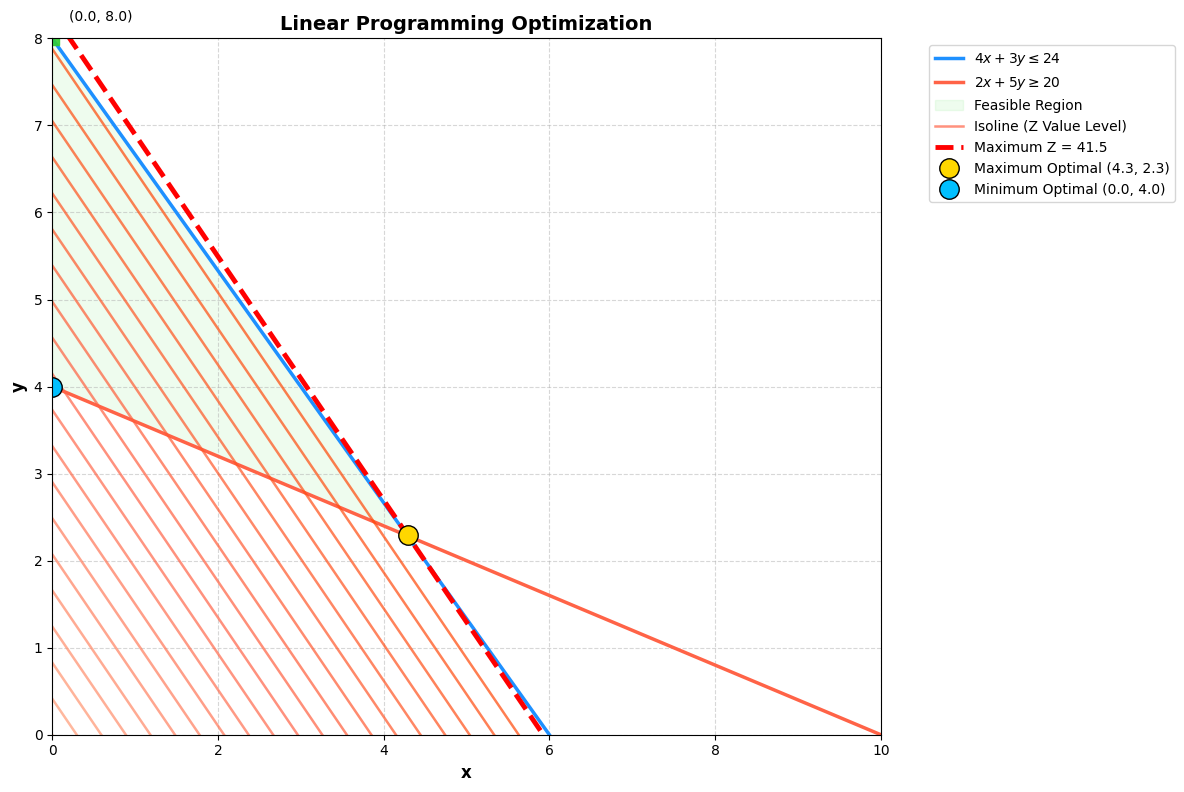

(np.float64(4.29), np.float64(2.29), np.float64(41.480000000000004))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def opt(a, b, c, d, e, f, g, h, x_max, y_max):
    """
    Visualization of linear programming with 2 constraints and objective function

    Parameters:
        a, b, c : Coefficients for constraint 1 (a*x + b*y ≤ c)
        d, e, f : Coefficients for constraint 2 (d*x + e*y ≥ f)
        g, h    : Coefficients for objective function (Z = g*x + h*y)
        x_max   : Maximum x-axis limit
        y_max   : Maximum y-axis limit
    """
    # Objective function
    def calculate_y_z(x, Z):
        return (Z - g*x)/h if h != 0 else np.zeros_like(x)

    # Constraint functions
    def constraint1(x):
        return (c - a*x)/b if b != 0 else np.zeros_like(x)

    def constraint2(x):
        return (f - d*x)/e if e != 0 else np.zeros_like(x)

    # Generate x values
    x = np.linspace(0, x_max, 1000)

    # Plot setup
    plt.figure(figsize=(12, 8))
    ax = plt.gca()

    # Custom colormap for isolines
    cmap = LinearSegmentedColormap.from_list('isoline', ['#FFA07A', '#FF6347', '#FF4500'])

    # Plot constraints
    plt.plot(x, constraint1(x), label=f'${a}x + {b}y \leq {c}$', color='#1E90FF', linewidth=2.5)
    plt.plot(x, constraint2(x), label=f'${d}x + {e}y \geq {f}$', color='#FF6347', linewidth=2.5)

    # Shade feasible region
    y_upper = constraint1(x)
    y_lower = constraint2(x)
    feasible_mask = (y_upper >= y_lower) & (y_lower >= 0) & (x >= 0)  # Stricter check
    plt.fill_between(x, y_lower, y_upper, where=feasible_mask,
                    alpha=0.15, color='#90EE90', label='Feasible Region')

    # Find all feasible corner points
    corner_points = []

    # 1. Intersection with x-axis (y=0)
    if a != 0:
        x_val = c / a
        if x_val >= 0 and x_val <= x_max and (d*x_val) >= f:  # Satisfies constraint 2
            corner_points.append((x_val, 0.0))

    # 2. Intersection with y-axis (x=0)
    if b != 0:
        y_val = c / b
        if y_val >= 0 and y_val <= y_max and (e*y_val) >= f:  # Satisfies constraint 2
            corner_points.append((0.0, y_val))

    # 3. Intersection of constraint 2 with x-axis (y=0)
    if d != 0:
        x_val = f / d
        if x_val >= 0 and x_val <= x_max and (a*x_val) <= c:  # Satisfies constraint 1
            corner_points.append((x_val, 0.0))

    # 4. Intersection of constraint 2 with y-axis (x=0)
    if e != 0:
        y_val = f / e
        if y_val >= 0 and y_val <= y_max and (b*y_val) <= c:  # Satisfies constraint 1
            corner_points.append((0.0, y_val))

    # 5. Intersection between two constraints
    try:
        A = np.array([[a, b], [d, e]])
        b_const = np.array([c, f])
        intersection = np.linalg.solve(A, b_const)
        x_intersect, y_intersect = intersection
        if (0 <= x_intersect <= x_max and
            0 <= y_intersect <= y_max and
            (a*x_intersect + b*y_intersect) <= c + 1e-6 and  # Tolerance for floating point
            (d*x_intersect + e*y_intersect) >= f - 1e-6):
            corner_points.append((x_intersect, y_intersect))
    except np.linalg.LinAlgError:
        pass

    # Remove duplicate points and sort
    corner_points = list(set([(round(x, 2), round(y, 2)) for (x, y) in corner_points]))
    corner_points.sort()

    # Calculate Z at all corner points
    if len(corner_points) > 0:
        Z_values = [g*x + h*y for (x, y) in corner_points]
        max_index = np.argmax(Z_values)
        min_index = np.argmin(Z_values)
        optimal_x, optimal_y = corner_points[max_index]
        optimal_Z = Z_values[max_index]
        min_Z = Z_values[min_index]

        # Draw 20 isolines before optimal (MAINTAIN THICKNESS 1.8)
        Z_min = 0
        Z_step = (optimal_Z - Z_min)/20
        Z_values_isol = np.arange(Z_min, optimal_Z, Z_step)

        #########################################################
        # ADDED SECTION - FOR ISOLINE LEGEND
        #########################################################
        # Create dummy plot specifically for isoline legend
        plt.plot([], [], '-', color='#FF6347', alpha=0.7, linewidth=1.8,
                 label='Isoline (Z Value Level)')
        #########################################################

        # Draw all isolines
        for i, Z in enumerate(Z_values_isol):
            y_isol = calculate_y_z(x, Z)
            plt.plot(x, y_isol, '-', color=cmap(i/20), alpha=0.7, linewidth=1.8)

        # Optimal line (MAINTAIN THICKNESS 3.5)
        y_optimal = calculate_y_z(x, optimal_Z)
        plt.plot(x, y_optimal, '--', color='#FF0000', alpha=1, linewidth=3.5,
                 label=f'Maximum Z = {optimal_Z:.1f}')

        # Optimal point (maximum)
        plt.plot(optimal_x, optimal_y, 'o', markersize=14,
                 markeredgecolor='black', markerfacecolor='#FFD700',
                 label=f'Maximum Optimal ({optimal_x:.1f}, {optimal_y:.1f})')

        # Minimum point
        min_x, min_y = corner_points[min_index]
        plt.plot(min_x, min_y, 'o', markersize=14,
                 markeredgecolor='black', markerfacecolor='#00BFFF',
                 label=f'Minimum Optimal ({min_x:.1f}, {min_y:.1f})')

        # Mark all feasible corner points
        for i, (x_val, y_val) in enumerate(corner_points):
            if i == max_index:
                continue  # Skip as already plotted as optimal point
            if i == min_index:
                continue  # Skip as already plotted as minimum point
            plt.plot(x_val, y_val, 's', markersize=10, color='#32CD32', alpha=0.9,
                    label='Feasible Point' if i == 0 else "")
            plt.text(x_val + 0.2, y_val + 0.2, f'({x_val:.1f}, {y_val:.1f})',
                    fontsize=10, color='black')

        print("\n=== ANALYSIS RESULTS ===")
        print(f"{'Point':<10} {'Coordinates':<20} {'Z Value':<10}")
        print("-"*40)
        for i, (point, z) in enumerate(zip(corner_points, Z_values)):
            print(f"Point {i+1:<5} ({point[0]:.1f}, {point[1]:.1f}){'':<5} {z:.1f}")

        print("\n" + "="*50)
        print(f"★ MAXIMUM OPTIMAL SOLUTION: ({optimal_x:.1f}, {optimal_y:.1f})")
        print(f"★ MAXIMUM Z VALUE: {optimal_Z:.1f}")
        print(f"★ MINIMUM OPTIMAL SOLUTION: ({min_x:.1f}, {min_y:.1f})")
        print(f"★ MINIMUM Z VALUE: {min_Z:.1f}")
        print("="*50)
    else:
        print("No points satisfy all constraints")
        return None

    # Plot styling
    plt.xlabel('x', fontsize=12, fontweight='bold')
    plt.ylabel('y', fontsize=12, fontweight='bold')
    plt.title('Linear Programming Optimization', fontsize=14, fontweight='bold')

    # Handle duplicate legends
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlim(0, x_max)
    plt.ylim(0, y_max)
    plt.tight_layout()
    plt.show()

    return optimal_x, optimal_y, optimal_Z

# Example usage:
opt(
    a=4, b=3, c=24,   # Constraint 1: 3x + 2y ≤ 18
    d=2, e=5, f=20,    # Constraint 2: x + y ≥ 6
    g=7, h=5,         # Objective function: Z = 6x + 4y
    x_max=10, y_max=8
)